### Number of Recent Calls (Easy) [TIP103-2-2]
- LeetCode: https://leetcode.com/problems/number-of-recent-calls/description/
- Video Solution: 

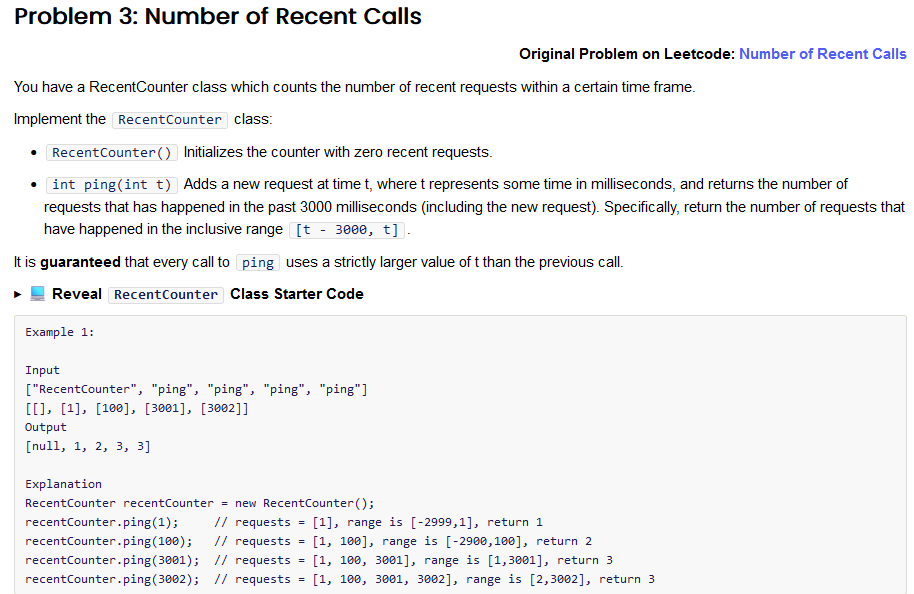



### Understand: Understand the problem and ask clarifying questions
    1. Need to implement a class with a cinstructor as well as an instance method
    2. Can we expect negative numbers in the pings?
        No the pings will always be positive
    3. Can we expect numbers to be in increasing order?
        Every ping will always use a larger value of t than the previous ping
    4. Can we expect an empty array as input?
        No assume atleast one ping

#### Establish cases
    ```
    HAPPY CASE
    Input
    ["RecentCounter", "ping", "ping", "ping", "ping"]
    [[], [1], [100], [3001], [3002]]
    Output
    [null, 1, 2, 3, 3]

    Explanation
    RecentCounter recentCounter = new RecentCounter();
    recentCounter.ping(1);     // requests = [1], range is [-2999,1], return 1
    recentCounter.ping(100);   // requests = [1, 100], range is [-2900,100], return 2
    recentCounter.ping(3001);  // requests = [1, 100, 3001], range is [1,3001], return 3
    recentCounter.ping(3002);  // requests = [1, 100, 3001, 3002], range is [2,3002], return 3
    
    Input
    ["RecentCounter", "ping", "ping", "ping", "ping"]
    [[], [1], [100], [300], [400],[4000]]
    Output
    [null, 1, 2, 3, 4, 1]
    ```

    ```
    EDGE CASE
    Input
    ["RecentCounter", "ping", "ping", "ping", "ping"]
    [[], [1]]
    Output
    [null, 1]
    ```


#### Match: find common techniques or Data Strucs to use
    If you are dealing with Arrays, there are some common techniques you can employ to help you solve the problem:

    1. Sort
        Will sorting the array help you solve the problem?

    2. Two pointer solutions (left and right pointer variables)
        Will two pointer help you record pings.

    3. Storing the elements of the array in a HashMap or a Set
        Will hashmap or hashset give you the ordering required for storing pings within 3000 milliseconds.

    4. Traversing the array with a sliding window
        Will a restrictive window help us?
        
    5. Use a Queue
        A queue will allow us to add a new ping and remove any ping in our queue that has more than 3000 milliseconds compared to our new ping.


#### Plan: Plan the solution with appropriate visualizations and pseudocode
Need to use a queue to eliminate the oldest ping: 
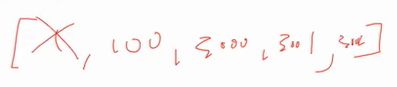

```
TIME_WINDOW = 3000

class RecentCounter:
    function new():
        init an instance variable queue

    function ping(t):
        enqueue enqueue time t to queue
        dequeue all pings that came BEFORE (t-TIME_WINDOW)
        after we process all pings we return the length of the queue
```


In [8]:
TIME_WINDOW = 3000
from collections import deque
class RecentCounter:
    def __init__(self):
        #init instance variable queue
        self.qList = []
        self.qDeque = deque()
    
    #Time: O(n)
    #Space: O(n) bc of queue
    def ping_list(self, t):
        #enqueue time t to queue
        self.qList.append(t)
        
        #dequeue all pings that came BEFORE (t-TIME_WINDOW)
        while self.qList and self.qList[0] < (t-TIME_WINDOW):
            self.qList.pop(0) #O(n) to pop the first element when using lists
        
        #after we process all pings we return the length of the queue
        return len(self.qList)
    
    #CAN USE DEQUE TO IMPROVE TIME COMPLEXITY
    
    #Time: O(1)
    #Space: O(n) bc of queue
    def ping_dequeu(self, t):
        #enqueue time t to queue
        self.qDeque.append(t)
        
        #dequeue all pings that came BEFORE (t-TIME_WINDOW)
        while self.qDeque and self.qDeque[0] < (t-TIME_WINDOW):
            self.qDeque.popleft() #O(1) when popping first element using deque
        
        #after we process all pings we return the length of the queue
        return len(self.qDeque)
    

In [10]:
rc = RecentCounter()
print("Test Using List")
print(rc.ping_list(1))     #requests = [1], range is [-2999,1], return 1
print(rc.ping_list(100))   #requests = [1, 100], range is [-2900,100], return 2
print(rc.ping_list(3001))  #requests = [1, 100, 3001], range is [1,3001], return 3
print(rc.ping_list(3002))  #requests = [1, 100, 3001, 3002], range is [2,3002], return 3

print("Test Using Deque")
print(rc.ping_dequeu(1))     #requests = [1], range is [-2999,1], return 1
print(rc.ping_dequeu(100))   #requests = [1, 100], range is [-2900,100], return 2
print(rc.ping_dequeu(3001))  #requests = [1, 100, 3001], range is [1,3001], return 3
print(rc.ping_dequeu(3002))  #requests = [1, 100, 3001, 3002], range is [2,3002], return 3

Test Using List
1
2
3
3
Test Using Deque
1
2
3
3
